In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df1=pd.read_csv(city_data_to_load)
df2=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_share_data=pd.merge(df2,df1,on="city",how="left")
# Display the data table for preview

In [2]:
ride_share_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/18 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/18 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/18 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/18 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/18 4:28,34.58,3.908450e+12,46,Urban


In [3]:
city_stuff = df1.set_index('city').sort_index()
city_stuff

,driver_count,type
city,,
Amandaburgh,12,Urban
Barajasview,26,Urban
Barronchester,11,Suburban
Bethanyland,22,Suburban
Bradshawfurt,7,Rural
Brandonfort,10,Suburban
Carriemouth,52,Urban
Christopherfurt,41,Urban
Colemanland,23,Suburban


In [4]:
my_colors = np.where(city_stuff['type']=="Urban","Lightcoral", np.where(city_stuff['type']=="Suburban", "Lightskyblue","Gold"))


## Bubble Plot of Ride Sharing Data

In [5]:
rides_per_city=ride_share_data.groupby("city")["driver_count"].count()

In [6]:
# check=ride_share_data.loc[ride_share_data["city"]=="Amandaburgh",:]
# check["fare"].mean()

In [7]:
mean_fare= ride_share_data.groupby("city")["fare"].mean()

In [8]:
# check=ride_share_data.loc[ride_share_data["type"]=="Urban",:]
# check["city"]

In [9]:
d_c=city_stuff["driver_count"]


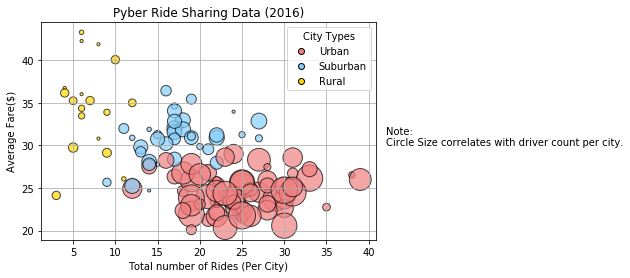

In [10]:
# Obtain the x and y coordinates for each of the three city types
rides_per_city=ride_share_data.groupby("city")["driver_count"].count()
mean_fare= ride_share_data.groupby("city")["fare"].mean()


# Build the scatter plots for each city types
plt.scatter(rides_per_city,mean_fare,marker="o",color=my_colors,edgecolors="black",s=d_c*10,alpha=0.70)

# Incorporate the other graph properties
plt.xlabel("Total number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")


legend_elements = [
    Line2D([0], [0], marker="o",color='black',lw=0,markerfacecolor='Lightcoral', label='Urban'),
    Line2D([0], [0], marker='o', color='black', lw=0, markerfacecolor='Lightskyblue',label='Suburban'),
    Line2D([0], [0], marker='o', color='black', lw=0,markerfacecolor='Gold',label='Rural')
]

# Create the figure
# fig, ax = plt.subplots()
plt.legend(title="City Types",handles=legend_elements, loc='best')

plt.text(42, 30, 'Note:\nCircle Size correlates with driver count per city.')

# Incorporate a text label regarding circle size
plt.grid()

# Save Figure
plt.savefig("data/scatter_ride_share.png")

# Show plot
plt.show()

## Total Fares by City Type

In [11]:
total_fare=ride_share_data["fare"].sum()
total_fare

63538.64

In [12]:
u_fare=ride_share_data.loc[ride_share_data["type"]=="Urban",:]
urban_fare=u_fare["fare"].sum()
urban_fare

39854.380000000005

In [13]:
s_fare=ride_share_data.loc[ride_share_data["type"]=="Suburban",:]
suburban_fare=s_fare["fare"].sum()
suburban_fare

19356.33

In [14]:
r_fare=ride_share_data.loc[ride_share_data["type"]=="Rural",:]
rural_fare=r_fare["fare"].sum()
rural_fare

4327.929999999999

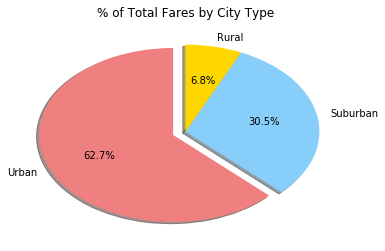

In [15]:
# Calculate Type Percents
u_perc= (urban_fare/total_fare)*100
s_perc=(suburban_fare/total_fare)*100
r_perc=(rural_fare/total_fare)*100

# Build Pie Chart
label=["Urban","Suburban","Rural"]
values=[u_perc,s_perc,r_perc]
colors=["Lightcoral","Lightskyblue","Gold"]
explode=[0.1, 0,0]

pie_plot=plt.pie(values, explode=explode, labels=label, colors=colors,autopct="%1.1f%%",shadow=True,startangle=90)

plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("data/total_fares_by_city_SK.png")

# Show Figure
plt.show()


## Total Rides by City Type

In [16]:
total=len(ride_share_data['type'])

In [17]:
total_urban=len(ride_share_data[ride_share_data['type'] == 'Urban'])

In [18]:
total_suburban=len(ride_share_data[ride_share_data['type'] == 'Suburban'])

In [19]:
total_rural=len(ride_share_data[ride_share_data['type'] == 'Rural'])

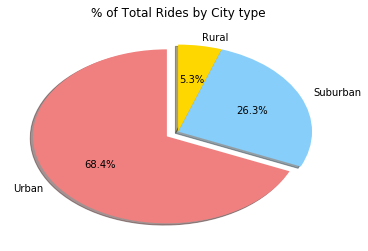

In [20]:
# Calculate Ride Percents

urban_perc=(total_urban/total)*100

suburban_perc=(total_suburban/total)*100

rural_perc=(total_rural/total)*100

# Build Pie Chart
label=["Urban","Suburban","Rural"]
values=[urban_perc,suburban_perc,rural_perc]
colors=["Lightcoral","Lightskyblue","Gold"]
explode=[0.1, 0,0]

pie_plot=plt.pie(values, explode=explode, labels=label, colors=colors,autopct="%1.1f%%",shadow=True,startangle=90)

plt.title("% of Total Rides by City type")

# Save Figure
plt.savefig("data/total_rides_by_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [21]:
total_drivers=sum(df1["driver_count"])

In [22]:
urban_d=df1.loc[df1["type"]=="Urban",:]
urban_drivers=urban_d["driver_count"].sum()

In [23]:
suburban_d=df1.loc[df1["type"]=="Suburban",:]
suburban_drivers=suburban_d["driver_count"].sum()

In [24]:
rural_d=df1.loc[df1["type"]=="Rural",:]
rural_drivers=rural_d["driver_count"].sum()

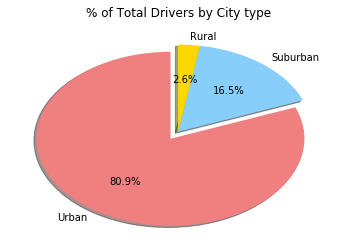

In [25]:
# Calculate Ride Percents

urban_d_perc=(urban_drivers/total_drivers)*100

suburban_d_perc=(suburban_drivers/total_drivers)*100

rural_d_perc=(rural_drivers/total_drivers)*100

# Build Pie Chart
label=["Urban","Suburban","Rural"]
values=[urban_d_perc,suburban_d_perc,rural_d_perc]
colors=["Lightcoral","Lightskyblue","Gold"]
explode=[0.1, 0,0]

pie_plot=plt.pie(values, explode=explode, labels=label, colors=colors,autopct="%1.1f%%",shadow=True,startangle=90)

plt.title("% of Total Drivers by City type")

# Save Figure
plt.savefig("data/total_drivers_by_city_type.png")

# Show Figure
plt.show()

Three observable trends based on the data:
1. Based on the data set, most of the drivers for ride share companies operate in Urban area.
2. A very high percentage of rides for ride share companies come from Urban areas
3. most of the fares collected by ride share companies come from customers in urban city types
4. The most expensive rides come from rural city types, though they are also fewer instances of that.
